In [0]:
%matplotlib inline
import torch
import numpy as np
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
from torchvision import transforms, datasets

In [2]:
apply_transform = transforms.Compose([transforms.ToTensor()])
BatchSize = [128,256,512]
trainLoader=[]
testLoader=[]
trainset = datasets.MNIST(root='./MNIST', train=True, download=True,                    transform=transforms.Compose([
                       transforms.Resize((32, 32)),
                       transforms.ToTensor()]))
testset = datasets.MNIST(root='./MNIST', train=False, download=True,                    transform=transforms.Compose([
                       transforms.Resize((32, 32)),
                       transforms.ToTensor()]))
for i in range(len(BatchSize)):
      trainloader = torch.utils.data.DataLoader(trainset, batch_size=BatchSize[i],
                                          shuffle=True, num_workers=4) # Creating dataloader
      trainLoader.append(trainloader)
      testloader = torch.utils.data.DataLoader(testset, batch_size=BatchSize[i],
                                         shuffle=False, num_workers=4) # Creating dataloader
      testLoader.append(testloader)


Extracting ./MNIST/MNIST/raw/train-images-idx3-ubyte.gz to ./MNIST/MNIST/raw



Extracting ./MNIST/MNIST/raw/train-labels-idx1-ubyte.gz to ./MNIST/MNIST/raw



Extracting ./MNIST/MNIST/raw/t10k-images-idx3-ubyte.gz to ./MNIST/MNIST/raw



Extracting ./MNIST/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./MNIST/MNIST/raw
Processing...
Done!


In [4]:
# Size of train and test datasets
for i in range(len(BatchSize)):
      print('No. of samples in train set: '+str(len(trainLoader[i].dataset)))
      print('No. of samples in test set: '+str(len(testLoader[i].dataset)))

No. of samples in train set: 60000
No. of samples in test set: 10000
No. of samples in train set: 60000
No. of samples in test set: 10000
No. of samples in train set: 60000
No. of samples in test set: 10000


In [5]:

class LeNet(nn.Module):
    def __init__(self):
        super(LeNet, self).__init__()
        self.conv1 = nn.Conv2d(1, 6, kernel_size=5)
        self.pool1 = nn.MaxPool2d(kernel_size=2,stride=2)
        self.conv2 = nn.Conv2d(6, 16, kernel_size=5)
        self.pool2 = nn.MaxPool2d(kernel_size=2,stride=2)        
        self.fc1 = nn.Linear(400, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = self.pool1(x)
        x = F.relu(self.conv2(x))
        x = self.pool2(x)
        x = x.view(-1, 400)
        x = F.relu(self.fc1(x)) 
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return F.log_softmax(x,dim=1)

net=LeNet()
print(net)

LeNet(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


In [0]:
def PLOTS(num_epochs,train_acc,train_loss):

  fig = plt.figure(figsize=[15,5]) 
  plt.subplot(121)
  plt.plot(range(num_epochs),train_loss,'r-',label='Loss') 
  plt.legend(loc='upper right')
  plt.xlabel('Epochs')
  plt.ylabel('Training')
  plt.subplot(122)
  plt.plot(range(num_epochs),train_acc,'g-',label='Accuracy') 
  plt.legend(loc='upper right')
  plt.xlabel('Epochs')
  plt.ylabel('Training')

In [0]:
from torch import optim
learning_rate=0.1
num_epochs=5
train_A=[[],[],[]]
train_L=[[],[],[]]
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=learning_rate)
#optimizer = optim.Adam(net.parametres(), lr=learning_rate)

In [0]:
#@title DIFFERENT BATCHSIZES SAME LEARNING RATE

In [22]:
# BATCHSIZE = 128
train_loss = []
train_acc = []
for epoch in range(num_epochs):
                running_loss = 0.0 
                running_corr = 0
          
                for i,data in enumerate(trainLoader[0]):
                    inputs,labels = data
                  # Initializing model gradients to zero
                    net.zero_grad()
                    optimizer.zero_grad() 
                    # Data feed-forward through the network
                    outputs = net(inputs)
                    # Predicted class is the one with maximum probability
                    preds = torch.argmax(outputs,dim=1)
                    # Finding the loss
                    loss = criterion(outputs, labels)
                    loss.backward()
                    optimizer.step()

                    # Accumulating the loss for each batch
                    running_loss += loss 
                    # Accumulate number of correct predictions
                    running_corr += torch.sum(preds==labels)    
                    
                totalLoss = running_loss/(i+1)
                # Calculating gradients
                

                # Updating the model parameters
                for f in net.parameters():
                    f.data.sub_(f.grad.data * learning_rate)
                    
                epoch_loss = running_loss.item()/(i+1)   #Total loss for one epoch
                epoch_acc = running_corr.item()/60000
                
                
                    
                train_loss.append(epoch_loss) #Saving the loss over epochs for plotting the graph
                train_acc.append(epoch_acc) #Saving the accuracy over epochs for plotting the graph
                  
                    
                print('Epoch {:.0f}/{:.0f} : Training loss: {:.4f} | Training Accuracy: {:.4f}'.format(epoch+1,num_epochs,epoch_loss,epoch_acc*100))


train_A[0]=train_acc
train_L[0]=train_loss  


Epoch 1/5 : Training loss: 0.0343 | Training Accuracy: 98.8967
Epoch 2/5 : Training loss: 0.0284 | Training Accuracy: 99.0950
Epoch 3/5 : Training loss: 0.0254 | Training Accuracy: 99.1817
Epoch 4/5 : Training loss: 0.0225 | Training Accuracy: 99.2650
Epoch 5/5 : Training loss: 0.0191 | Training Accuracy: 99.3733


In [23]:
# BATCHSIZE = 256
train_loss = []
train_acc = []
for epoch in range(num_epochs):
                running_loss = 0.0 
                running_corr = 0
          
                for i,data in enumerate(trainLoader[1]):
                    inputs,labels = data
                  # Initializing model gradients to zero
                    net.zero_grad()
                    optimizer.zero_grad() 
                    # Data feed-forward through the network
                    outputs = net(inputs)
                    # Predicted class is the one with maximum probability
                    preds = torch.argmax(outputs,dim=1)
                    # Finding the loss
                    loss = criterion(outputs, labels)
                    loss.backward()
                    optimizer.step()

                    # Accumulating the loss for each batch
                    running_loss += loss 
                    # Accumulate number of correct predictions
                    running_corr += torch.sum(preds==labels)    
                    
                totalLoss = running_loss/(i+1)
                # Calculating gradients
                

                # Updating the model parameters
                for f in net.parameters():
                    f.data.sub_(f.grad.data * learning_rate)
                    
                epoch_loss = running_loss.item()/(i+1)   #Total loss for one epoch
                epoch_acc = running_corr.item()/60000
                
                
                    
                train_loss.append(epoch_loss) #Saving the loss over epochs for plotting the graph
                train_acc.append(epoch_acc) #Saving the accuracy over epochs for plotting the graph
                  
                    
                print('Epoch {:.0f}/{:.0f} : Training loss: {:.4f} | Training Accuracy: {:.4f}'.format(epoch+1,num_epochs,epoch_loss,epoch_acc*100))


train_A[1]=train_acc
train_L[1]=train_loss
      


Epoch 1/5 : Training loss: 0.0120 | Training Accuracy: 99.6467
Epoch 2/5 : Training loss: 0.0102 | Training Accuracy: 99.7200
Epoch 3/5 : Training loss: 0.0091 | Training Accuracy: 99.7550
Epoch 4/5 : Training loss: 0.0079 | Training Accuracy: 99.8000
Epoch 5/5 : Training loss: 0.0079 | Training Accuracy: 99.7717


In [24]:
# BATCHSIZE = 512
train_loss = []
train_acc = []
for epoch in range(num_epochs):
                running_loss = 0.0 
                running_corr = 0
          
                for i,data in enumerate(trainLoader[2]):
                    inputs,labels = data
                  # Initializing model gradients to zero
                    net.zero_grad()
                    optimizer.zero_grad() 
                    # Data feed-forward through the network
                    outputs = net(inputs)
                    # Predicted class is the one with maximum probability
                    preds = torch.argmax(outputs,dim=1)
                    # Finding the loss
                    loss = criterion(outputs, labels)
                    loss.backward()
                    optimizer.step()

                    # Accumulating the loss for each batch
                    running_loss += loss 
                    # Accumulate number of correct predictions
                    running_corr += torch.sum(preds==labels)    
                    
                totalLoss = running_loss/(i+1)
                # Calculating gradients
                

                # Updating the model parameters
                for f in net.parameters():
                    f.data.sub_(f.grad.data * learning_rate)
                    
                epoch_loss = running_loss.item()/(i+1)   #Total loss for one epoch
                epoch_acc = running_corr.item()/60000
                
                
                    
                train_loss.append(epoch_loss) #Saving the loss over epochs for plotting the graph
                train_acc.append(epoch_acc) #Saving the accuracy over epochs for plotting the graph
                  
                    
                print('Epoch {:.0f}/{:.0f} : Training loss: {:.4f} | Training Accuracy: {:.4f}'.format(epoch+1,num_epochs,epoch_loss,epoch_acc*100))



train_A[2]=train_acc
train_L[2]=train_loss  


Epoch 1/5 : Training loss: 0.0055 | Training Accuracy: 99.8750
Epoch 2/5 : Training loss: 0.0049 | Training Accuracy: 99.8983
Epoch 3/5 : Training loss: 0.0048 | Training Accuracy: 99.8950
Epoch 4/5 : Training loss: 0.0043 | Training Accuracy: 99.9067
Epoch 5/5 : Training loss: 0.0041 | Training Accuracy: 99.9250


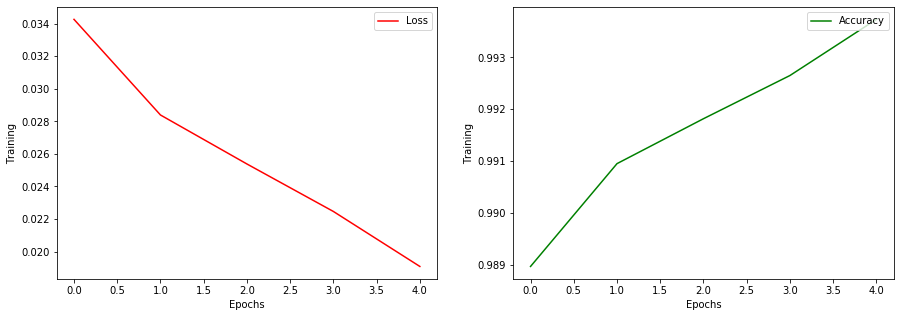

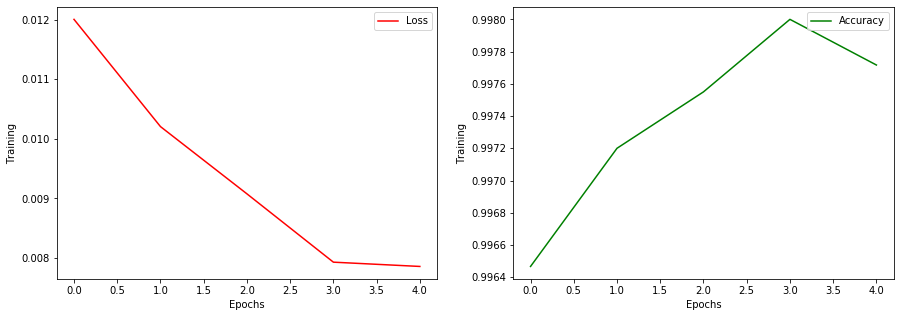

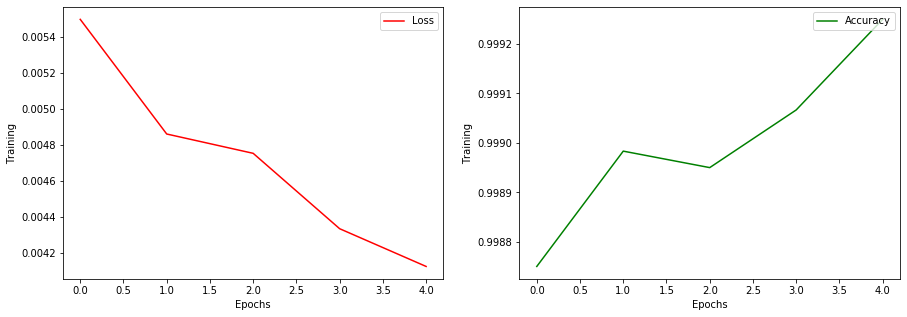

In [25]:

for i in range(len(BatchSize)):
      PLOTS(num_epochs,train_A[i],train_L[i])


In [33]:
for i in range(len(BatchSize)):
    correct_pred = 0
    for data in testLoader[i]:
              inputs,labels = data
              # Feedforward train data batch through model
              output = net(inputs) 
              # Predicted class is the one with maximum probability
              preds = torch.argmax(output,dim=1)
              correct_pred += torch.sum(preds==labels)

    test_accuracy = correct_pred.item()/10000.0
    print('Testing accuracy = ',test_accuracy*100)

Testing accuracy =  99.03999999999999
Testing accuracy =  99.03999999999999
Testing accuracy =  99.03999999999999


In [0]:
#@title SAME BATCHSIZE AND DIFFERENT LEARNING RATES


In [0]:
from torch import optim
learning_rate=[0.05,0.1,0.2]
num_epochs=5
train_A=[[],[],[]]
train_L=[[],[],[]]

#optimizer = optim.Adam(net.parametres(), lr=learning_rate)

In [36]:
#Learning rate = 0.05 for batchsize =256
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=learning_rate[0])
train_loss = []
train_acc = []
for epoch in range(num_epochs):
                running_loss = 0.0 
                running_corr = 0
          
                for i,data in enumerate(trainLoader[1]):
                    inputs,labels = data
                  # Initializing model gradients to zero
                    net.zero_grad()
                    optimizer.zero_grad() 
                    # Data feed-forward through the network
                    outputs = net(inputs)
                    # Predicted class is the one with maximum probability
                    preds = torch.argmax(outputs,dim=1)
                    # Finding the loss
                    loss = criterion(outputs, labels)
                    loss.backward()
                    optimizer.step()

                    # Accumulating the loss for each batch
                    running_loss += loss 
                    # Accumulate number of correct predictions
                    running_corr += torch.sum(preds==labels)    
                    
                totalLoss = running_loss/(i+1)
                # Calculating gradients
                

                # Updating the model parameters
                for f in net.parameters():
                    f.data.sub_(f.grad.data * learning_rate[0])
                    
                epoch_loss = running_loss.item()/(i+1)   #Total loss for one epoch
                epoch_acc = running_corr.item()/60000
                
                
                    
                train_loss.append(epoch_loss) #Saving the loss over epochs for plotting the graph
                train_acc.append(epoch_acc) #Saving the accuracy over epochs for plotting the graph
                  
                    
                print('Epoch {:.0f}/{:.0f} : Training loss: {:.4f} | Training Accuracy: {:.4f}'.format(epoch+1,num_epochs,epoch_loss,epoch_acc*100))



train_A[0]=train_acc
train_L[0]=train_loss  


Epoch 1/5 : Training loss: 0.0039 | Training Accuracy: 99.9333
Epoch 2/5 : Training loss: 0.0037 | Training Accuracy: 99.9400
Epoch 3/5 : Training loss: 0.0038 | Training Accuracy: 99.9267
Epoch 4/5 : Training loss: 0.0037 | Training Accuracy: 99.9333
Epoch 5/5 : Training loss: 0.0032 | Training Accuracy: 99.9500


In [37]:
#Learning rate = 0.1 for batchsize =256
train_loss = []
train_acc = []
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=learning_rate[1])
for epoch in range(num_epochs):
                running_loss = 0.0 
                running_corr = 0
          
                for i,data in enumerate(trainLoader[1]):
                    inputs,labels = data
                  # Initializing model gradients to zero
                    net.zero_grad()
                    optimizer.zero_grad() 
                    # Data feed-forward through the network
                    outputs = net(inputs)
                    # Predicted class is the one with maximum probability
                    preds = torch.argmax(outputs,dim=1)
                    # Finding the loss
                    loss = criterion(outputs, labels)
                    loss.backward()
                    optimizer.step()

                    # Accumulating the loss for each batch
                    running_loss += loss 
                    # Accumulate number of correct predictions
                    running_corr += torch.sum(preds==labels)    
                    
                totalLoss = running_loss/(i+1)
                # Calculating gradients
                

                # Updating the model parameters
                for f in net.parameters():
                    f.data.sub_(f.grad.data * learning_rate[1])
                    
                epoch_loss = running_loss.item()/(i+1)   #Total loss for one epoch
                epoch_acc = running_corr.item()/60000
                
                
                    
                train_loss.append(epoch_loss) #Saving the loss over epochs for plotting the graph
                train_acc.append(epoch_acc) #Saving the accuracy over epochs for plotting the graph
                  
                    
                print('Epoch {:.0f}/{:.0f} : Training loss: {:.4f} | Training Accuracy: {:.4f}'.format(epoch+1,num_epochs,epoch_loss,epoch_acc*100))



train_A[1]=train_acc
train_L[1]=train_loss  


Epoch 1/5 : Training loss: 0.0040 | Training Accuracy: 99.9083
Epoch 2/5 : Training loss: 0.0825 | Training Accuracy: 97.8833
Epoch 3/5 : Training loss: 0.0156 | Training Accuracy: 99.4833
Epoch 4/5 : Training loss: 0.0107 | Training Accuracy: 99.6767
Epoch 5/5 : Training loss: 0.0099 | Training Accuracy: 99.7183


In [38]:
#Learning rate = 0.2 for batchsize =256
train_loss = []
train_acc = []
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=learning_rate[2])
for epoch in range(num_epochs):
                running_loss = 0.0 
                running_corr = 0
          
                for i,data in enumerate(trainLoader[1]):
                    inputs,labels = data
                  # Initializing model gradients to zero
                    net.zero_grad()
                    optimizer.zero_grad() 
                    # Data feed-forward through the network
                    outputs = net(inputs)
                    # Predicted class is the one with maximum probability
                    preds = torch.argmax(outputs,dim=1)
                    # Finding the loss
                    loss = criterion(outputs, labels)
                    loss.backward()
                    optimizer.step()

                    # Accumulating the loss for each batch
                    running_loss += loss 
                    # Accumulate number of correct predictions
                    running_corr += torch.sum(preds==labels)    
                    
                totalLoss = running_loss/(i+1)
                # Calculating gradients
                

                # Updating the model parameters
                for f in net.parameters():
                    f.data.sub_(f.grad.data * learning_rate[2])
                    
                epoch_loss = running_loss.item()/(i+1)   #Total loss for one epoch
                epoch_acc = running_corr.item()/60000
                
                
                    
                train_loss.append(epoch_loss) #Saving the loss over epochs for plotting the graph
                train_acc.append(epoch_acc) #Saving the accuracy over epochs for plotting the graph
                  
                    
                print('Epoch {:.0f}/{:.0f} : Training loss: {:.4f} | Training Accuracy: {:.4f}'.format(epoch+1,num_epochs,epoch_loss,epoch_acc*100))



train_A[2]=train_acc
train_L[2]=train_loss  


Epoch 1/5 : Training loss: 0.4495 | Training Accuracy: 89.1467
Epoch 2/5 : Training loss: 0.0684 | Training Accuracy: 97.8633
Epoch 3/5 : Training loss: 0.0477 | Training Accuracy: 98.5167
Epoch 4/5 : Training loss: 0.0390 | Training Accuracy: 98.7367
Epoch 5/5 : Training loss: 0.0406 | Training Accuracy: 98.7067


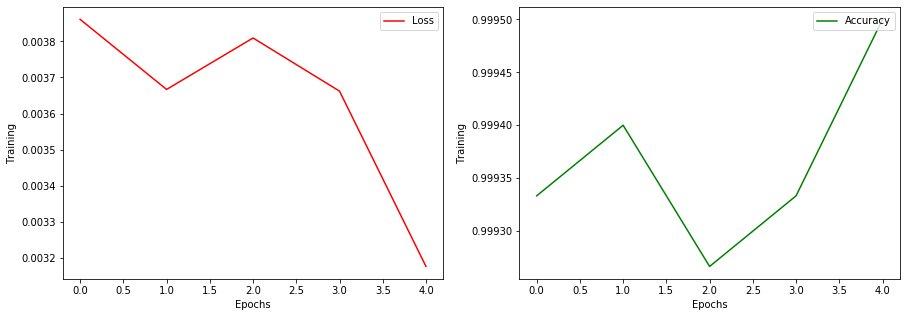

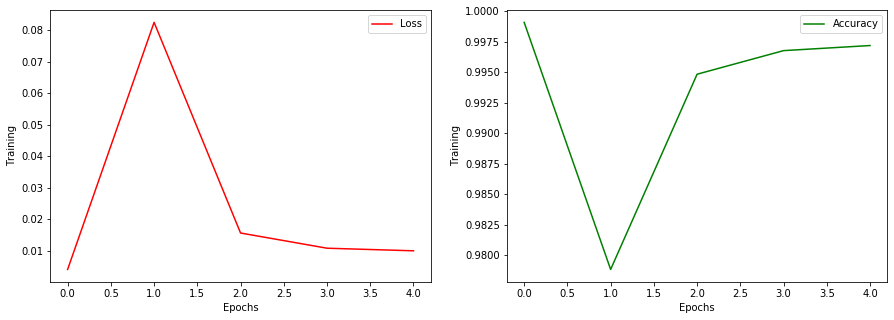

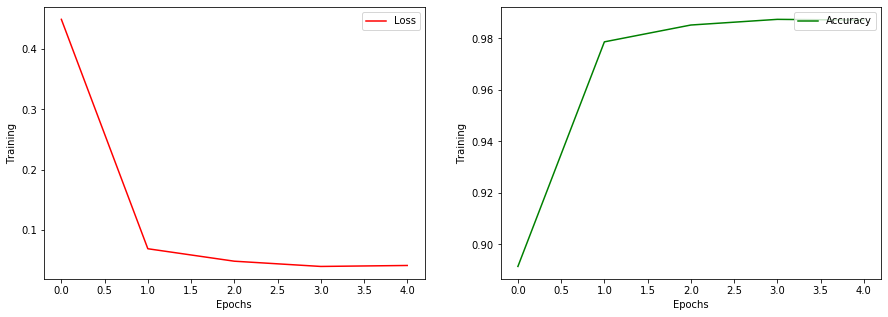

In [39]:

for i in range(len(BatchSize)):
      PLOTS(num_epochs,train_A[i],train_L[i])
